### Что сделал: отчистил датасет, теперь новый data/preprocessed/train_preprocessed.csv
Поля:
- src - аккадианский текст без всякого говна, обработаный
- tgt - перевод

Осталось разбить на предложения, но черт знает как. Понятно что надо использовать Sentences_Oare_FirstWord_LinNum.csv и возможно над исходным датасетом data/raw/train.csv, до препроцессинга.


In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import seaborn as sns # type: ignore

%load_ext autoreload
%autoreload 2

from src.config import Config
from src.seed import seed_everything
from src.preprocessing import preprocess_pipeline
from src.eda import analyze_dataset

seed_everything(Config.SEED)
sns.set_style("whitegrid")
print("Environment ready.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Environment ready.


--- Analyzing: RAW DATA ---
Total samples: 1561

Length Statistics:
 SRC_mean  SRC_median  SRC_95%  SRC_max  TGT_mean  TGT_median  TGT_95%  TGT_max
   426.46       365.0    897.0      932    499.72       383.0   1351.0     3895

Vocabulary Check:
[transliteration] Unique characters count: 90
[transliteration] Sample chars: [' ', '(', ')', '+', '-', '.', '0', '1', '2', '3'] ... ['₀', '₁', '₃', '₄', '₅', '₆', '₇', '₈', 'ₓ', '⌈']
[translation] Unique characters count: 110
[translation] Sample chars: [' ', '!', '"', "'", '(', ')', '+', ',', '-', '.'] ... ['ṭ', 'ạ', '–', '—', '’', '“', '”', '⅓', '⅔', '⅚']


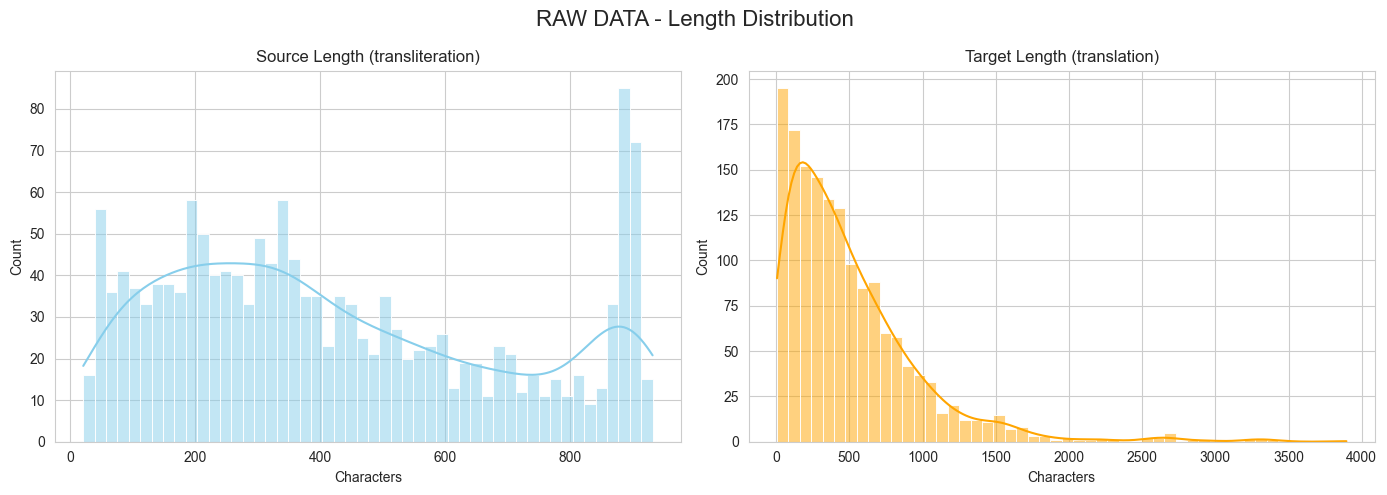

In [9]:
raw_df = pd.read_csv(Config.RAW_DATA_PATH)

analyze_dataset(
    raw_df, 
    src_col='transliteration', 
    tgt_col='translation', 
    name="RAW DATA"
)

In [10]:
df_clean = preprocess_pipeline()

Reading from c:\Users\mv\Documents\deep-past-competition\data\raw\train.csv...


Cleaning TGT: 100%|██████████| 1561/1561 [00:00<00:00, 31701.18it/s]

Rows after cleaning & dedup: 1561
Directory check complete. Data path: c:\Users\mv\Documents\deep-past-competition\data\processed\train_preprocessed.csv
Saved to c:\Users\mv\Documents\deep-past-competition\data\processed\train_preprocessed.csv


--- Analyzing: CLEAN DATA ---
Total samples: 1561

Length Statistics:
 SRC_mean  SRC_median  SRC_95%  SRC_max  TGT_mean  TGT_median  TGT_95%  TGT_max
   429.57       368.0    900.0      988    503.71       385.0   1371.0     3983

Vocabulary Check:
[src] Unique characters count: 79
[src] Sample chars: [' ', '(', '+', '-', '.', '0', '1', '2', '3', '4'] ... ['í', 'ù', 'ú', 'Š', 'š', 'ʾ', 'Ṣ', 'ṣ', 'ṭ', '⌈']
[tgt] Unique characters count: 110
[tgt] Sample chars: [' ', '!', '"', "'", '(', ')', '+', ',', '-', '.'] ... ['ṭ', 'ạ', '–', '—', '’', '“', '”', '⅓', '⅔', '⅚']


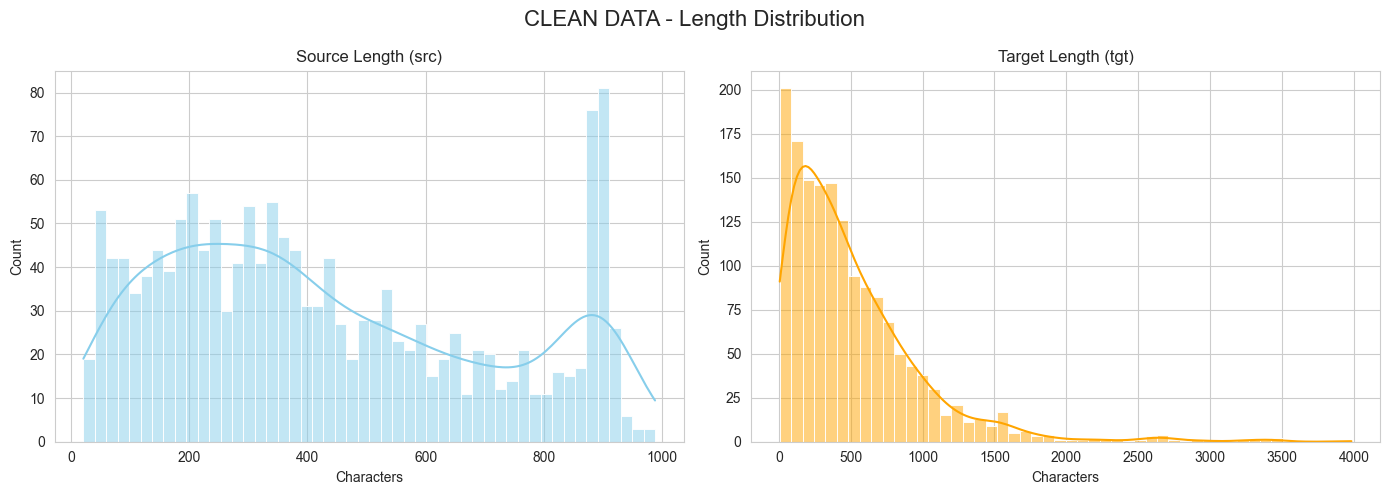

In [11]:
analyze_dataset(
    df_clean, 
    src_col='src', 
    tgt_col='tgt', 
    name="CLEAN DATA"
)

In [12]:
print("--- Random Clean Samples ---")
for i, row in df_clean.sample(5).iterrows():
    print(f"SRC: {row['src']}")
    print(f"TGT: {row['tgt']}")
    print("-" * 50)

--- Random Clean Samples ---
SRC: 10 ma-na KÙ.BABBAR ṣa-ru-pu-um ni-is-ha-sú DIRI ša-du-a-sú ša-bu ša tám-kà-ri-im a-na i-li-a ù ša ki-ma lá-qé-ep ù a-ha-ma 0.33333 ma-na KÙ.BABBAR ša ta-ad-mì-iq-tí-šu ša i-li-a 1 GÍN KÙ.BABBAR šé-bu-ul-tù-šu a-na er-ra-ili5 0.33333 ma-na KÙ.BABBAR ša 3 TÚGe-pí-šé-e 3 GÍN šé-bu-ul-ta-ša a-na ší-ša-ra mì-ma a-nim ša lá-qé-ep 0.66666 ma-na KÙ.BABBAR a-na da-dí-a 0.33333 ma-na a-na en-nam-a-šur 0.33333 ma-na a-na a-šur-re-ṣí 3 GÍN a-na a-šur-re-ṣí ŠU.NÍGIN 4 ri-ik-sú ša e-lá-ma mì-ma a-nim ša lá-qé-ep a-na šu-be-lim áp-qí-id IGI a-šùr-na-da DUMU a-šùr-i-dí IGI šu-sú-in DUMU šu-hu-bu-ur
TGT: 10 minas of refined silver, its excise added, his transport fee paid, belonging to the merchant, for Iliya and the representatives of Lā-qēp, and separately 0.3333 mina of silver from Iliya's free loan. 1 shekel of silver, his consignment for Erra-ilī. 0.3333 mina of silver for 3 -textiles, 3 shekels of silver, her consignment for Šī-šarra all this of Lā-qēp. 0.6666 mi